# SMS Spam Detection

In [189]:
# Importing Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


In [190]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [191]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [192]:
# Reading file
df = pd.read_csv('/content/spam_sms.csv')
df


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [193]:
# Column names need to be changed
df.rename({'v1' : 'label',
           'v2' : 'sms' },
          axis = 1, inplace = True)
df


,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## 1. Data Exploration and Preprocessing

In [194]:
# Checking total ham and spam
df['label']. value_counts()


,count
label,
ham,4825
spam,747


In [195]:
# Checking null values
df.isnull().sum()

# No null values

,0
label,0
sms,0


In [196]:
# Checking duplicates
df.duplicated(keep = False).sum()


np.int64(684)

In [197]:
# Checking the duplicated rows by masking
df[df.duplicated(keep = False) == True]


,label,sms
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [198]:
# Removing duplicated rows keeping the first one
df.drop_duplicates(keep = 'first', inplace = True)


In [199]:
# Checking the duplicates again
df.duplicated(keep = False).sum()

# Duplicate rows removed

np.int64(0)

In [200]:
# checking total rows now
df.shape


(5169, 2)

In [201]:
# Checking total ham and spam again
df['label'].value_counts()


,count
label,
ham,4516
spam,653


In [202]:
# Checking total percentage of the ham and spam in label
df['label'].value_counts()/df['label'].value_counts().sum() * 100


,count
label,
ham,87.366996
spam,12.633004


In [203]:
# Checking info
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5169 non-null   object
 1   sms     5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


## 2. Tokenization

### 1 - Sentence Tokenization

In [204]:
# Performing tokenization using function
# Using length to check how many sentences in that message
def tokenizeSent(sms):
  return len(sent_tokenize(sms))


In [205]:
# Checking the sms, 3rd row, last column
df.iloc[2, -1]


"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [206]:
# Checking how many sentences in 3rd message
tokenizeSent(df.iloc[2, -1])


2

In [207]:
# Showing which 2 sentences in 3rd sms
sent_tokenize(df.iloc[2, -1])


['Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005.',
 "Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]

### 2 - Word Tokenization

In [208]:
def tokenizeWord(sms):
  return len(word_tokenize(sms))


In [209]:
# Checking how many words in 3rd message
tokenizeWord(df.iloc[2, -1])


37

In [210]:
# Showing those 37 words in 3rd sms
word_tokenize(df.iloc[2, -1])


['Free',
 'entry',
 'in',
 '2',
 'a',
 'wkly',
 'comp',
 'to',
 'win',
 'FA',
 'Cup',
 'final',
 'tkts',
 '21st',
 'May',
 '2005',
 '.',
 'Text',
 'FA',
 'to',
 '87121',
 'to',
 'receive',
 'entry',
 'question',
 '(',
 'std',
 'txt',
 'rate',
 ')',
 'T',
 '&',
 'C',
 "'s",
 'apply',
 '08452810075over18',
 "'s"]

In [211]:
# Adding two more Columns to the dataset
df['sentence_count'] = df['sms'].apply(tokenizeSent)
df['word_count'] = df['sms'].apply(tokenizeWord)

# Showing new dataset
df

,label,sms,sentence_count,word_count
0,ham,"Go until jurong point, crazy.. Available only ...",2,24
1,ham,Ok lar... Joking wif u oni...,2,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,2,37
3,ham,U dun say so early hor... U c already then say...,1,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",1,15
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,4,35
5568,ham,Will Ì_ b going to esplanade fr home?,1,9
5569,ham,"Pity, * was in mood for that. So...any other s...",2,15
5570,ham,The guy did some bitching but I acted like i'd...,1,27


## 3. Visualization

### 1 - Sentence Count Plot

In [212]:
import warnings
warnings.filterwarnings('ignore')


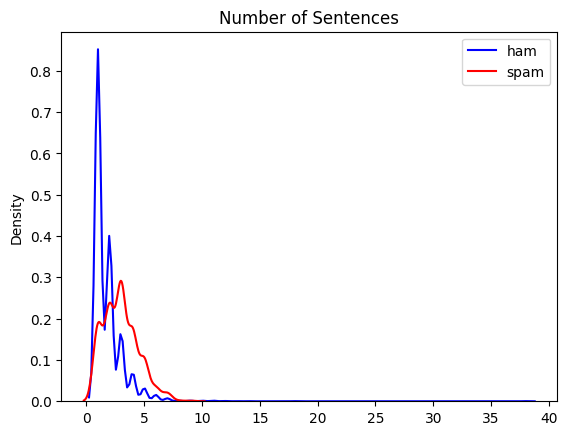

In [213]:
# Visualizing sentence count for ham and spam
# hist=False - Tells Seaborn to not plot the histogram bars, only show the KDE curve (the smooth line).
sns.distplot(df[df['label']=='ham']['sentence_count'].values, color='blue', hist=False, label='ham')
sns.distplot(df[df['label']=='spam']['sentence_count'].values, color='red', hist=False, label='spam')

# Deciding title
plt.title('Number of Sentences')
plt.legend()

# showing plot
plt.show()


### 2 - Word Count Plot

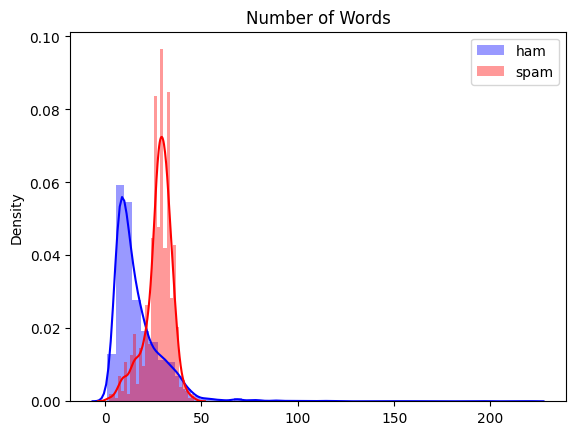

In [214]:
# Visualizing sentence count for ham and spam
sns.distplot(df[df['label']== 'ham']['word_count'].values, hist = True, color = 'Blue' , label = 'ham')
sns.distplot(df[df['label']== 'spam']['word_count'].values, color = 'red', hist = True, label ='spam')

# Deciding title
plt.title('Number of Words')
plt.legend()

# showing plot
plt.show()


## 4. Stopwords
Stopwords are the common words in a language that usually don’t add much meaning, so we often remove them when processing text.
## Examples of stopwords in English:

"the"

"is"

"in"

"and"

"on"

"a"

In [215]:
# Checking stopwords in english
stopwords.words('english')


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [216]:
# Total Stopwords in English
len(stopwords.words('english'))


198

## 4. Text Preprocessing
Cleaning and preparing text so that computers can understand it better.


In [217]:
# Taking a function and 3 empty lists for storing text
def text_preProcessing(text):
 L1 = []
 L2 = []
 L3 = []

 # Converting to lowercase first
 text = text.lower()

 # Tokenization
 text = word_tokenize(text)

 # Only keeping alphabets and numbers using for loop
 for word in text:
  if word.isalnum():
   L1.append(word)

 # Removing Stopwords
 for word in L1:
  if word not in stopwords.words('english'):
    L2.append(word)

 # Stemming
 objec = PorterStemmer()
 for word in L2:
  L3.append(objec.stem(word))

 # Join back
 return " ".join(L3)

In [218]:
# Taking a text for example and applying preprocessing
text_preProcessing('Pakistan has been doing well. They have beaten Afghanistan!')


'pakistan well beaten afghanistan'

In [219]:
# Applying Text PreProcessing on different sms from our dataset
df['sms'][0]


'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [220]:
# After PreProcessing
text_preProcessing(df['sms'][0])


'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [221]:
# After PreProcessing of sms on index 3
text_preProcessing(df['sms'][3])


'u dun say earli hor u c alreadi say'

In [222]:
# Checking our Dataset
df

,label,sms,sentence_count,word_count
0,ham,"Go until jurong point, crazy.. Available only ...",2,24
1,ham,Ok lar... Joking wif u oni...,2,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,2,37
3,ham,U dun say so early hor... U c already then say...,1,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",1,15
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,4,35
5568,ham,Will Ì_ b going to esplanade fr home?,1,9
5569,ham,"Pity, * was in mood for that. So...any other s...",2,15
5570,ham,The guy did some bitching but I acted like i'd...,1,27


In [223]:
# Adding another column of preprocessing
df['preprocessed'] = df['sms'].apply(text_preProcessing)

# Displaying updated dataset
df.head(5)


,label,sms,sentence_count,word_count,preprocessed
0,ham,"Go until jurong point, crazy.. Available only ...",2,24,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,2,8,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,2,37,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,1,13,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",1,15,nah think goe usf live around though


## 6. Visualization For Spam & Ham Word Cloud

In [224]:
# Importing Library
from wordcloud import WordCloud


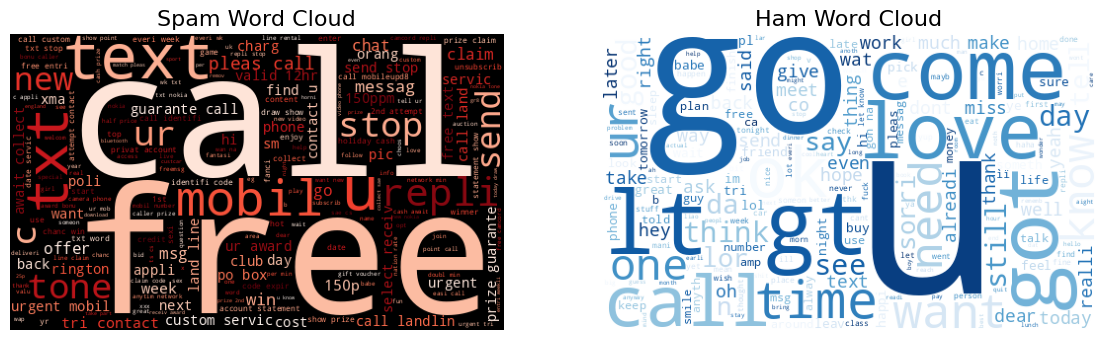

In [225]:
# Importing Library
from wordcloud import WordCloud

# Visualizing Word Cloud
spam_text = " ".join(df[df['label'] == 'spam']['preprocessed'])
ham_text = " ".join(df[df['label'] == 'ham']['preprocessed'])

# Selecting size of figure
fig, ax = plt.subplots(1, 2, figsize = (14, 6))

# Making plot for spam
ax[0].imshow(WordCloud(width=500, height=300, background_color="black", colormap="Reds").generate(spam_text))
ax[0].set_title("Spam Word Cloud", fontsize=16)
ax[0].axis('off')

# Selecting plot for ham
ax[1].imshow(WordCloud(width=500, height=300, background_color="white", colormap="Blues").generate(ham_text))
ax[1].set_title("Ham Word Cloud", fontsize=16)
ax[1].axis('off')

# Showing plots
plt.show()


## 7. Sunburst Visualization For Spam And Ham Keyword

In [226]:
# Importing necessary libraries
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer


In [227]:
# Making Sunburst For Spam Keyword
# Joining all spam messages into one string
spam_text = " ".join(df[df['label'] == 'spam']['preprocessed'])

# This removes English stopwords (like 'the', 'is') and limits to top 30 words.
cv = CountVectorizer(stop_words = "english", max_features = 30)

# X is a sparse matrix (1 row, 30 columns) showing word counts.
X = cv.fit_transform([spam_text])
words = cv.get_feature_names_out()

# - category: we assign "spam" to all rows (used as the root in the sunburst)
# - word: the top 30 words found
# - count: how many times each word appears
sunburst = pd.DataFrame({
    "category": ['spam'] * len(words),
    "word" : words,
    "count" : X.toarray()[0]   # Converting the sparse matrix to a normal array
})

# Making subburst chart
# path: defines the hierarchy (category → word)
# - values: the word counts
# - color: color scale based on count
fig = px.sunburst(sunburst, path = ['category', 'word'], values = 'count', color = 'count',
                  color_continuous_scale = 'Reds')
# Setting chart title and displaying it
fig.update_layout(title="Spam Keyword Sunburst")
fig.show()


In [228]:
# Making Sunburst For Ham Word
ham_text = " ".join(df[df['label'] == 'ham']['preprocessed'])

cv = CountVectorizer(stop_words = ['english'], max_features = 30)

X = cv.fit_transform([ham_text])

words = cv.get_feature_names_out()

sunburst = pd.DataFrame({
    'category' : ['ham'] *len(words),
    'word' : words,
    'count' : X.toarray()[0]
})

fig = px.sunburst(sunburst, path = ['category', 'word'], values = 'count', color = 'count',
                  color_continuous_scale= 'Blues')


# Deciding title and displaying sunburst plot
fig.update_layout(title = 'Ham Keyword Sunburst')
fig.show()


In [229]:
df['preprocessed'][3]

'u dun say earli hor u c alreadi say'

## 8. Selecting feature and Target

In [230]:
cv = CountVectorizer()

In [231]:
# Selecting x as Feature
x = cv.fit_transform(df['preprocessed'])
x


<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 40628 stored elements and shape (5169, 6708)>

In [232]:
# Converting it to array
x = x.toarray()
x


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [233]:
# Selecting y as target
y = df['label']
y


,label
0,ham
1,ham
2,spam
3,ham
4,ham
...,...
5567,spam
5568,ham
5569,ham
5570,ham


## 9. Label Encoding

In [234]:
# importing library
from sklearn.preprocessing import LabelEncoder


In [235]:
# Applying label encodinh on the label column
le = LabelEncoder()
y = le.fit_transform(y)
y


array([0, 0, 1, ..., 0, 0, 0])

## 10. Splitting (Test And Train)

In [236]:
# Importing library
from sklearn.model_selection import train_test_split


In [237]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

## 11. Training and Evaluation

In [238]:
# Importing Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB
from sklearn.metrics import accuracy_score,precision_score


In [241]:
# Decision Tree Classifier Accuracy and Precision Score
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Precision: ", precision_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))


Precision:  0.8615384615384616
Accuracy:  0.9506769825918762


In [242]:
# GaussianNB Accuracy and Precision Score
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Precision: ", precision_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))


Precision:  0.5185185185185185
Accuracy:  0.8684719535783365


In [243]:
# MultinomialNB Accuracy and Precision Score
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Precision: ", precision_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))


Precision:  0.8881578947368421
Accuracy:  0.9738878143133463


In [244]:
# BernoulliNB Accuracy and Precision Score
classifier = BernoulliNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Precision: ", precision_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))


Precision:  0.9661016949152542
Accuracy:  0.9661508704061895


In [245]:
# ComplementNB Accuracy and Precision Score
classifier = ComplementNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Precision: ", precision_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))


Precision:  0.7025641025641025
Accuracy:  0.9361702127659575


# Checking If A Message Is Spam

In [248]:
# Importing library
import plotly.graph_objects as go


In [250]:
email = "Congratulations! You have won a free vacation."
cleaned = text_preProcessing(email)


In [251]:
# # Vectorize the email
vector = cv.transform([cleaned])
vector = vector.toarray()


In [252]:
# classifier.predict_proba(test) - Predicts probability for each class (e.g., spam or ham) for the input test.
# [0]	Gets the first result (for one message).
# [1]	Gets the probability for class 1 → usually, 1 means spam, and 0 means ham.
spam_prob = classifier.predict_proba(vector)[0][1]


In [268]:
# Visualization
fig = go.Figure(go.Indicator(
    mode = 'gauge+number',
    value = spam_prob * 100,
    title = {'text': 'Spam Probability %'},
    gauge = {'axis' : {'range': [1, 100]}, 'bar': {'color': "red"}}

))

# Showing plot
fig.show()
